In [1]:
import pandas as pd
import math
import geopandas as gpd
from shapely.geometry import Point, LineString
import os
import spatialite

In [2]:
name = '20201211_134207.mp4'
db_path = '/home/aubreytensor1/Guam02/map/Guam02.db'

In [3]:
# Read a a pickled dataframe containing lat lon.
df = pd.read_pickle(f'/home/aubreytensor1/Guam02/map/{name}.pikl')
df

,time,lat,lon,elevation,accuracy,bearing,speed,satellites,provider,hdop,vdop,pdop,geoidheight,ageofdgpsdata,dgpsid,activity,battery,annotation
1153,2020-12-11 03:45:17.999,13.465293,144.694048,73.653534,4.0,234.71838,14.482941,27,gps,1.0,1.5,1.8,49.5,NaN,NaN,NaN,97,NaN
1154,2020-12-11 03:45:18.999,13.465215,144.693941,73.658495,4.0,233.24323,14.306335,24,gps,0.9,1.4,1.6,49.5,NaN,NaN,NaN,97,NaN
1155,2020-12-11 03:45:20.999,13.465053,144.693739,73.660075,4.0,229.16808,14.151920,26,gps,0.9,1.4,1.6,49.5,NaN,NaN,NaN,97,NaN
1156,2020-12-11 03:45:22.999,13.464881,144.693540,73.728305,4.0,229.02380,14.350318,25,gps,1.0,1.3,1.6,49.5,NaN,NaN,NaN,97,NaN
1157,2020-12-11 03:45:23.999,13.464795,144.693440,73.747476,4.0,228.97200,14.362541,26,gps,1.0,1.3,1.6,49.5,NaN,NaN,NaN,97,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,2020-12-11 04:19:09.000,13.268123,144.664911,72.118045,4.0,152.32211,10.949270,23,gps,0.9,1.6,1.9,49.5,NaN,NaN,NaN,100,NaN
2308,2020-12-11 04:19:11.000,13.267967,144.665011,71.703881,4.0,143.55989,10.322861,25,gps,0.9,1.6,1.9,49.5,NaN,NaN,NaN,100,NaN
2309,2020-12-11 04:19:13.000,13.267842,144.665137,72.089352,4.0,127.64044,9.609566,26,gps,1.0,1.6,1.8,49.5,NaN,NaN,NaN,100,NaN
2310,2020-12-11 04:19:15.000,13.267758,144.665269,72.296592,4.0,115.41876,8.530318,26,gps,0.9,1.6,1.8,49.5,NaN,NaN,NaN,100,NaN


<AxesSubplot:>

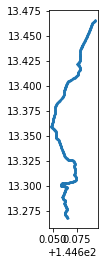

In [4]:
# Convert dataframe to a geodataframe
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = df.drop(['lat', 'lon'], axis=1)
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
gdf.plot(markersize=1)

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

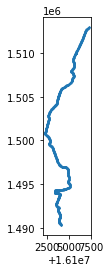

In [5]:
# Reproject geometry to UTM (meters)
gdf = gdf.to_crs('EPSG:3857')
gdf.plot(markersize=1)
gdf.crs

1159


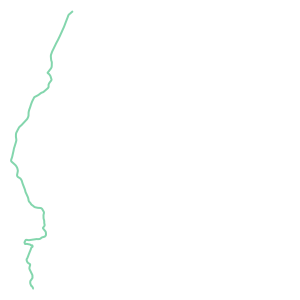

In [6]:
ls = LineString(gdf.geometry.to_list())
print(len(ls.coords))
ls

115


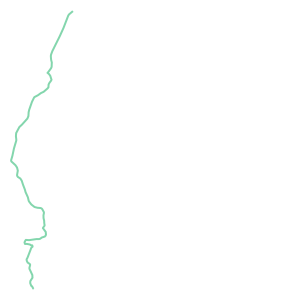

In [7]:
lss = ls.simplify(10)
print(len(lss.coords))
lss

In [8]:
type(lss)

shapely.geometry.linestring.LineString

In [9]:
lss.length

28073.615830461276

In [10]:
lss.wkt

'LINESTRING (16107267.72348971 1512941.418758502, 16106954.27355019 1512674.144507931, 16106889.93041187 1512583.625712211, 16106498.73434191 1511566.923238935, 16106201.49503171 1510910.397780343, 16105596.39384303 1509692.586176307, 16105489.53928338 1509407.22601009, 16105470.01381776 1509289.092396042, 16105481.2330439 1509098.765829051, 16105496.27257299 1508963.207300688, 16105549.03828777 1508760.812829058, 16105532.86493122 1508399.417176066, 16105484.08923578 1508287.248449506, 16105209.45085232 1507915.435943683, 16105332.46878395 1507804.759114039, 16105420.43415602 1507679.180279197, 16105521.6549769 1507359.738157232, 16105495.0119703 1507289.897006279, 16105359.93891387 1507108.214028612, 16105304.40405818 1507004.909722797, 16105285.51920899 1506948.115519593, 16105272.77348639 1506739.659197715, 16105205.40710817 1506650.930785335, 16104883.64471335 1506373.522292945, 16104661.5736892 1506268.617379535, 16104422.76959744 1506095.171397654, 16104140.8837077 1505945.57579

In [11]:
with spatialite.connect(db_path) as db:
    sql = f"DELETE FROM tracks WHERE name='{name}';"
    print(sql)
    db.execute(sql)
    sql = f"INSERT INTO tracks VALUES(NULL, '{name}', GeomFromText('{lss.wkt}',3857));"
    print(sql)
    db.execute(sql)
    db.commit()

DELETE FROM tracks WHERE name='20201211_134207.mp4';
INSERT INTO tracks VALUES(NULL, '20201211_134207.mp4', GeomFromText('LINESTRING (16107267.72348971 1512941.418758502, 16106954.27355019 1512674.144507931, 16106889.93041187 1512583.625712211, 16106498.73434191 1511566.923238935, 16106201.49503171 1510910.397780343, 16105596.39384303 1509692.586176307, 16105489.53928338 1509407.22601009, 16105470.01381776 1509289.092396042, 16105481.2330439 1509098.765829051, 16105496.27257299 1508963.207300688, 16105549.03828777 1508760.812829058, 16105532.86493122 1508399.417176066, 16105484.08923578 1508287.248449506, 16105209.45085232 1507915.435943683, 16105332.46878395 1507804.759114039, 16105420.43415602 1507679.180279197, 16105521.6549769 1507359.738157232, 16105495.0119703 1507289.897006279, 16105359.93891387 1507108.214028612, 16105304.40405818 1507004.909722797, 16105285.51920899 1506948.115519593, 16105272.77348639 1506739.659197715, 16105205.40710817 1506650.930785335, 16104883.64471335 1